In [2]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [110]:
events = pd.read_csv("holidays_events.csv")
events.head()


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [111]:
events.tail()

,date,type,locale,locale_name,description,transferred
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False
349,2017-12-26,Additional,National,Ecuador,Navidad+1,False


In [112]:
events.nunique()

date           312
type             6
locale           3
locale_name     24
description    103
transferred      2
dtype: int64

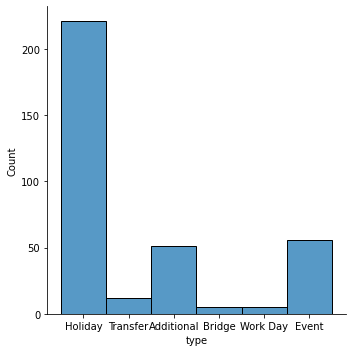

In [133]:
sns.displot(data = events, x='type') #check the distribution of events as they occured in the holiday

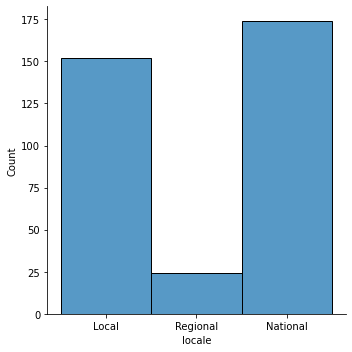

In [136]:
sns.displot(data = events, x='locale') #majority of the events held on the holiday were national events, followed by local and regional

In [137]:
events.isnull().sum() #checking whether there are null values in the data

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [167]:
events.drop(columns=['description','locale_name','date'], inplace=True)

In [168]:
events.head()

,type,locale,transferred
0,Holiday,1,0
1,Holiday,2,0
2,Holiday,1,0
3,Holiday,1,0
4,Holiday,1,0


In [169]:
events['transferred'] =np.where((events['transferred'] == True), 1, 0)

In [170]:
#convert the string data to int
events['locale'].mask(events['locale'] == 'Local',1, inplace=True)
events['locale'].mask(events['locale'] == 'Regional',2, inplace=True)
events['locale'].mask(events['locale'] == 'National',3, inplace=True)

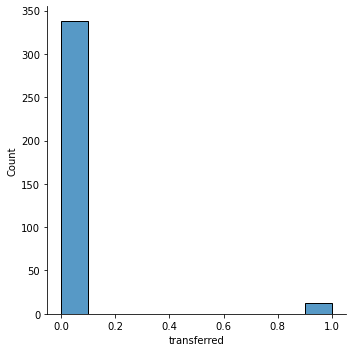

In [171]:
sns.displot(events.transferred) 

In [172]:
# now determine whether the events held in different locations were transferred or not
from sklearn.model_selection import train_test_split

In [173]:
X = events.drop(columns=["transferred",'type'])
y = events.transferred
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [174]:
from sklearn.linear_model import LogisticRegression

In [175]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [177]:
model.predict([[1]]) #most events were not transferred, regardless of the locale, most events were not transffered. 

array([0])

In [178]:
model.score(X_test, y_test) #the model is 93% accurate that most events could not be transffered. This could be supported by the lowest number of transferred events

0.9318181818181818